# Week 14: Data Pre-Processing & Regression - Student Assignments

## Overview
This document contains practical tasks, assignments, and assessments designed to test your understanding of data preprocessing techniques and regression analysis covered in Week 14.

## Part 1: Tasks

### Task 1: Missing Data Management
**Objective**: Practice handling missing values in datasets

**Dataset**: `Task-Datasets/task1_data_with_missing.csv`

**Instructions**:
1. Load the provided dataset (15 rows with Name, Age, City, Income, Product_Rating)
2. The dataset already contains missing values
3. Handle the missing values using:
   - Mean imputation
   - Mode imputation
4. Document your approach


In [31]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [32]:
#Importing dataset
dataset = pd.read_csv("task1_data_with_missing.csv")
dataset

,Name,Age,City,Income,Product_Rating
0,John,25.0,New York,45000.0,4.5
1,Sarah,32.0,Los Angeles,62000.0,4.8
2,Mike,NaN,Chicago,55000.0,4.2
3,Emily,28.0,Houston,NaN,4.7
4,David,45.0,Phoenix,78000.0,NaN
5,Lisa,35.0,NaN,67000.0,4.6
6,Tom,29.0,Philadelphia,51000.0,4.3
7,Anna,NaN,San Antonio,59000.0,4.9
8,Chris,41.0,San Diego,72000.0,4.1
9,Jessica,33.0,Dallas,NaN,4.8


In [33]:
#Extract independent variables
X = dataset.iloc[:, :-2].values
X

array([['John', 25.0, 'New York'],
       ['Sarah', 32.0, 'Los Angeles'],
       ['Mike', nan, 'Chicago'],
       ['Emily', 28.0, 'Houston'],
       ['David', 45.0, 'Phoenix'],
       ['Lisa', 35.0, nan],
       ['Tom', 29.0, 'Philadelphia'],
       ['Anna', nan, 'San Antonio'],
       ['Chris', 41.0, 'San Diego'],
       ['Jessica', 33.0, 'Dallas'],
       ['Mark', 27.0, 'San Jose'],
       ['Rachel', 38.0, 'Austin'],
       ['Kevin', nan, 'Jacksonville'],
       ['Michelle', 31.0, 'San Francisco'],
       ['Brian', 44.0, 'Indianapolis']], dtype=object)

In [34]:
#To extract dependent variables
Y = dataset.iloc[:, -2:].values
Y

array([[4.5e+04, 4.5e+00],
       [6.2e+04, 4.8e+00],
       [5.5e+04, 4.2e+00],
       [    nan, 4.7e+00],
       [7.8e+04,     nan],
       [6.7e+04, 4.6e+00],
       [5.1e+04, 4.3e+00],
       [5.9e+04, 4.9e+00],
       [7.2e+04, 4.1e+00],
       [    nan, 4.8e+00],
       [4.8e+04,     nan],
       [6.9e+04, 4.5e+00],
       [5.6e+04, 4.4e+00],
       [    nan, 4.7e+00],
       [7.5e+04, 4.2e+00]])

In [35]:
#Handling missing values in the age column using mean method
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(X[:, 1].reshape(-1, 1))
X[:, 1] = imputer.transform(X[:, 1].reshape(-1, 1)).flatten()
X

array([['John', 25.0, 'New York'],
       ['Sarah', 32.0, 'Los Angeles'],
       ['Mike', 34.0, 'Chicago'],
       ['Emily', 28.0, 'Houston'],
       ['David', 45.0, 'Phoenix'],
       ['Lisa', 35.0, nan],
       ['Tom', 29.0, 'Philadelphia'],
       ['Anna', 34.0, 'San Antonio'],
       ['Chris', 41.0, 'San Diego'],
       ['Jessica', 33.0, 'Dallas'],
       ['Mark', 27.0, 'San Jose'],
       ['Rachel', 38.0, 'Austin'],
       ['Kevin', 34.0, 'Jacksonville'],
       ['Michelle', 31.0, 'San Francisco'],
       ['Brian', 44.0, 'Indianapolis']], dtype=object)

In [36]:
#Handling missing values in the city column using mode method
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X[:, 2] = imputer.fit_transform(X[:, 2].reshape(-1, 1)).flatten()
X

array([['John', 25.0, 'New York'],
       ['Sarah', 32.0, 'Los Angeles'],
       ['Mike', 34.0, 'Chicago'],
       ['Emily', 28.0, 'Houston'],
       ['David', 45.0, 'Phoenix'],
       ['Lisa', 35.0, 'Austin'],
       ['Tom', 29.0, 'Philadelphia'],
       ['Anna', 34.0, 'San Antonio'],
       ['Chris', 41.0, 'San Diego'],
       ['Jessica', 33.0, 'Dallas'],
       ['Mark', 27.0, 'San Jose'],
       ['Rachel', 38.0, 'Austin'],
       ['Kevin', 34.0, 'Jacksonville'],
       ['Michelle', 31.0, 'San Francisco'],
       ['Brian', 44.0, 'Indianapolis']], dtype=object)

In [37]:
#Handling null values in the income and product_rating columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Y[:, -2:] = imputer.fit_transform(Y[:, -2:])
Y

array([[4.50000000e+04, 4.50000000e+00],
       [6.20000000e+04, 4.80000000e+00],
       [5.50000000e+04, 4.20000000e+00],
       [6.14166667e+04, 4.70000000e+00],
       [7.80000000e+04, 4.51538462e+00],
       [6.70000000e+04, 4.60000000e+00],
       [5.10000000e+04, 4.30000000e+00],
       [5.90000000e+04, 4.90000000e+00],
       [7.20000000e+04, 4.10000000e+00],
       [6.14166667e+04, 4.80000000e+00],
       [4.80000000e+04, 4.51538462e+00],
       [6.90000000e+04, 4.50000000e+00],
       [5.60000000e+04, 4.40000000e+00],
       [6.14166667e+04, 4.70000000e+00],
       [7.50000000e+04, 4.20000000e+00]])

**Approach to Task 1: Missing Data Management**

The dataset contained missing values across multiple columns, including Age, Income, Product_Rating, Name and City. After loading the dataset, the variables were separated into independent features (Name, Age, City) and dependent features (Income and Product_Rating) to allow targeted preprocessing.

Mean imputation was applied to the numerical variables (Age, Income, and Product_Rating). Missing values in these columns were replaced with the average of the available observations using the SimpleImputer class. This approach minimises distortion during analysis.

Mode imputation was applied to the categorical variables (Name and City). Missing entries were replaced with the most frequent value in each column to ensure categorical consistency and complete the dataset.

After preprocessing, all missing values were successfully handled, resulting in a clean dataset suitable for further analysis and modelling. These imputation techniques maintain data integrity while reducing bias introduced by missing values.

### Task 2: Encoding Categorical Variables
**Objective**: Master encoding techniques for categorical data

**Dataset**: `Task-Datasets/task2_categorical_data.csv`

**Instructions**:
1. Load the provided dataset with:
   - Categorical independent variables: City, Product_Type
   - Categorical dependent variable: Purchased (Yes/No)
   - Numerical features: Age, Purchase_Amount
2. Apply OneHotEncoder to City and Product_Type
3. Apply LabelEncoder to the Purchased variable
4. Print the shapes and first 5 rows before and after encoding


In [38]:
# Importing dataset
Task2 = pd.read_csv("task2_categorical_data.csv")
X_before = Task2.iloc[:, :-2].values
Y_before = Task2.iloc[:, -2:].values

In [39]:
Task2

,CustomerID,City,Product_Type,Age,Purchase_Amount,Purchased
0,C001,Mumbai,Electronics,28,15000,Yes
1,C002,Delhi,Clothing,35,3500,No
2,C003,Bangalore,Electronics,42,22000,Yes
3,C004,Mumbai,Furniture,29,8500,No
4,C005,Chennai,Electronics,31,18000,Yes
5,C006,Delhi,Clothing,45,4200,Yes
6,C007,Bangalore,Furniture,38,12000,Yes
7,C008,Mumbai,Electronics,27,16500,No
8,C009,Chennai,Clothing,33,2800,No
9,C010,Delhi,Furniture,41,9500,Yes


In [40]:
X_before

array([['C001', 'Mumbai', 'Electronics', 28],
       ['C002', 'Delhi', 'Clothing', 35],
       ['C003', 'Bangalore', 'Electronics', 42],
       ['C004', 'Mumbai', 'Furniture', 29],
       ['C005', 'Chennai', 'Electronics', 31],
       ['C006', 'Delhi', 'Clothing', 45],
       ['C007', 'Bangalore', 'Furniture', 38],
       ['C008', 'Mumbai', 'Electronics', 27],
       ['C009', 'Chennai', 'Clothing', 33],
       ['C010', 'Delhi', 'Furniture', 41],
       ['C011', 'Bangalore', 'Electronics', 36],
       ['C012', 'Mumbai', 'Clothing', 30],
       ['C013', 'Chennai', 'Furniture', 44],
       ['C014', 'Delhi', 'Electronics', 26],
       ['C015', 'Bangalore', 'Clothing', 39],
       ['C016', 'Mumbai', 'Furniture', 32],
       ['C017', 'Chennai', 'Electronics', 28],
       ['C018', 'Delhi', 'Clothing', 37],
       ['C019', 'Bangalore', 'Furniture', 43],
       ['C020', 'Mumbai', 'Electronics', 29]], dtype=object)

In [41]:
Y_before

array([[15000, 'Yes'],
       [3500, 'No'],
       [22000, 'Yes'],
       [8500, 'No'],
       [18000, 'Yes'],
       [4200, 'Yes'],
       [12000, 'Yes'],
       [16500, 'No'],
       [2800, 'No'],
       [9500, 'Yes'],
       [19500, 'Yes'],
       [3100, 'No'],
       [11000, 'Yes'],
       [14500, 'No'],
       [4800, 'Yes'],
       [10200, 'Yes'],
       [17000, 'Yes'],
       [3900, 'No'],
       [13500, 'Yes'],
       [16000, 'No']], dtype=object)

In [42]:
#Encoding independent variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('onehotencoder', OneHotEncoder(categories='auto'), [1, 2]),
    ('age_passthrough', 'passthrough', [3])
],
remainder='drop'
)
X_after = ct.fit_transform(X_before)
X_after

array([[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 28],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 35],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 42],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 29],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 31],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 45],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 38],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 27],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 33],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 41],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 36],
       [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 30],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 44],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 26],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 39],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 32],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 28],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 43],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 29]], dtype=object)

In [43]:
Y_before = Task2.iloc[:, -1]
Y_before

,Purchased
0,Yes
1,No
2,Yes
3,No
4,Yes
5,Yes
6,Yes
7,No
8,No
9,Yes


In [44]:
# Encoding dependent variable
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(categories='auto'),[0])],
                                     remainder='passthrough')
le = LabelEncoder()
Y_after = le.fit_transform(Y_before)
Y_after

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [45]:
#Printing the shapes and first 5 rows before and after encoding

print("\nBefore encoding (X first 5 rows):")
print(X_before[:5])
print("Shape of X before:", X_before.shape)

print("\nAfter encoding (X first 5 rows):")
print(X_after[:5])
print("Shape of X after:", X_after.shape)

print("\nBefore encoding (Y first 5 rows):")
print(Y_before[:5])
print("Shape of Y before:", Y_before.shape)

print("\nAfter encoding (Y first 5 rows):")
print(Y_after[:5])
print("Shape of Y after:", Y_after.shape)


Before encoding (X first 5 rows):
[['C001' 'Mumbai' 'Electronics' 28]
 ['C002' 'Delhi' 'Clothing' 35]
 ['C003' 'Bangalore' 'Electronics' 42]
 ['C004' 'Mumbai' 'Furniture' 29]
 ['C005' 'Chennai' 'Electronics' 31]]
Shape of X before: (20, 4)

After encoding (X first 5 rows):
[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 28]
 [0.0 0.0 1.0 0.0 1.0 0.0 0.0 35]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 42]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 29]
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 31]]
Shape of X after: (20, 8)

Before encoding (Y first 5 rows):
0    Yes
1     No
2    Yes
3     No
4    Yes
Name: Purchased, dtype: object
Shape of Y before: (20,)

After encoding (Y first 5 rows):
[1 0 1 0 1]
Shape of Y after: (20,)


**Approach to Task 2: Encoding Categorical Variables**

The dataset contained independent variables (City and Product_Type), numerical features (Age and Purchase_Amount), and a dependent variable (Purchased). Before preprocessing, the dataset's structure and shape were examined to establish a baseline. OneHotEncoder was applied to the independent variables to convert them into binary indicator columns, allowing machine learning models to interpret non-numeric categories. The numerical feature, Age, was passed through without transformation to preserve its original values. LabelEncoder was applied to the dependent variable 'Purchased' to convert Yes/No responses into numeric labels (1 and 0). After encoding, the dataset expanded in dimensionality due to one-hot representation, still maintaining the original number of observations. The first five rows and shapes before and after encoding confirmed that the transformation was successful and the dataset is now suitable for model training.

### Task 3: Feature Scaling Comparison
**Objective**: Understand the impact of feature scaling

**Dataset**: `Task-Datasets/task3_scaling_data.csv`

**Instructions**:
1. Load the provided dataset with features on different scales:
   - Age: 23-46
   - Annual_Salary: 32,000-108,000
   - Years_Experience: 1-23
   - Performance_Score: 71-95
2. Split the data into training and test sets (80/20)
3. Apply `StandardScaler` to both sets
4. Create visualizations showing:
   - Original data distribution
   - Scaled data distribution
5. Calculate and display the mean and standard deviation before and after scaling

In [46]:
# Importing dataset
Task3 = pd.read_csv("task3_scaling_data.csv")
Task3

,EmployeeID,Age,Annual_Salary,Years_Experience,Performance_Score
0,E001,23,32000,1,72
1,E002,28,45000,4,78
2,E003,35,68000,10,85
3,E004,42,95000,18,92
4,E005,29,48000,5,76
5,E006,31,55000,7,81
6,E007,45,105000,22,94
7,E008,26,38000,2,74
8,E009,38,78000,14,88
9,E010,33,62000,9,83


In [47]:
# Importing dataset
X = Task3.iloc[:, 1:4].values
Y = Task3.iloc[:, -1].values

In [48]:
X

array([[    23,  32000,      1],
       [    28,  45000,      4],
       [    35,  68000,     10],
       [    42,  95000,     18],
       [    29,  48000,      5],
       [    31,  55000,      7],
       [    45, 105000,     22],
       [    26,  38000,      2],
       [    38,  78000,     14],
       [    33,  62000,      9],
       [    41,  92000,     17],
       [    27,  42000,      3],
       [    36,  72000,     12],
       [    44,  98000,     20],
       [    30,  52000,      6],
       [    34,  65000,     11],
       [    43,  96000,     19],
       [    25,  36000,      1],
       [    39,  82000,     15],
       [    32,  58000,      8],
       [    46, 108000,     23],
       [    24,  34000,      1],
       [    37,  75000,     13],
       [    40,  88000,     16],
       [    29,  49000,      5]])

In [49]:
Y

array([72, 78, 85, 92, 76, 81, 94, 74, 88, 83, 91, 75, 86, 93, 79, 84, 92,
       73, 89, 82, 95, 71, 87, 90, 77])

In [50]:
#2. Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [51]:
X_train

array([[    37,  75000,     13],
       [    25,  36000,      1],
       [    29,  49000,      5],
       [    40,  88000,     16],
       [    30,  52000,      6],
       [    28,  45000,      4],
       [    41,  92000,     17],
       [    44,  98000,     20],
       [    38,  78000,     14],
       [    45, 105000,     22],
       [    39,  82000,     15],
       [    29,  48000,      5],
       [    33,  62000,      9],
       [    26,  38000,      2],
       [    46, 108000,     23],
       [    42,  95000,     18],
       [    23,  32000,      1],
       [    24,  34000,      1],
       [    34,  65000,     11],
       [    36,  72000,     12]])

In [52]:
X_test

array([[   31, 55000,     7],
       [   35, 68000,    10],
       [   32, 58000,     8],
       [   43, 96000,    19],
       [   27, 42000,     3]])

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [54]:
# Feature Scaling
sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(Y_train.reshape(-1, 1))
Y_test = sc_Y.transform(Y_test.reshape(-1, 1))

In [55]:
X_train.shape

(20, 3)

In [56]:
Y_train.shape

(20, 1)

In [57]:
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()
Y_train_orig = Y_train.copy()
Y_test_orig = Y_test.copy()

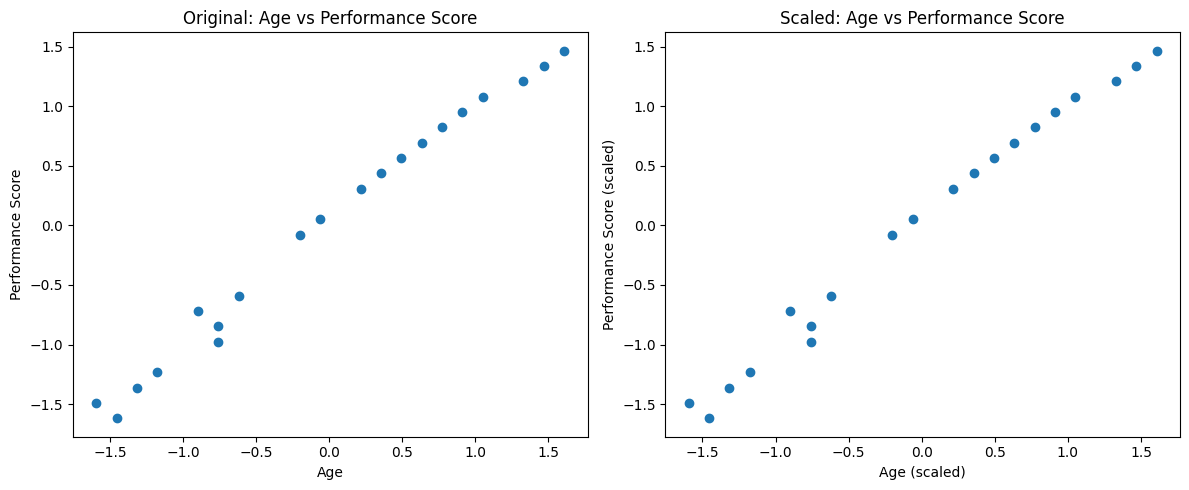

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# BEFORE scaling
plt.subplot(1,2,1)
plt.scatter(X_train_orig[:, 0], Y_train_orig)
plt.title("Original: Age vs Performance Score")
plt.xlabel("Age")
plt.ylabel("Performance Score")

# AFTER scaling
plt.subplot(1,2,2)
plt.scatter(X_train[:, 0], Y_train)
plt.title("Scaled: Age vs Performance Score")
plt.xlabel("Age (scaled)")
plt.ylabel("Performance Score (scaled)")

plt.tight_layout()
plt.show()

In [59]:
#Calculating the mean and standard deviation before and after scaling
print("\nBEFORE SCALING")
print("Mean (X_train):", np.mean(X_train_orig, axis=0))
print("Std  (X_train):", np.std(X_train_orig, axis=0))

print("\nFTER SCALING")
print("Mean (X_train scaled):", np.mean(X_train, axis=0))
print("Std  (X_train scaled):", np.std(X_train, axis=0))


BEFORE SCALING
Mean (X_train): [-3.70536934e-16 -1.38777878e-18  4.16333634e-18]
Std  (X_train): [1. 1. 1.]

FTER SCALING
Mean (X_train scaled): [-3.70536934e-16 -1.38777878e-18  4.16333634e-18]
Std  (X_train scaled): [1. 1. 1.]


**Approach to Task 3: Feature Scaling Comparison**


The Task 3 dataset contained features, including Age, Annual Salary, Years of Experience and Performance Score. The dataset was split into training and test sets using an 80/20 ratio. StandardScaler was applied to normalise the training data and transform the test data using the same scaling parameters to make sure no data leakage occurred.

Before scaling, the features exhibited significantly different means and standard deviations due to their varied ranges. After scaling, the transformed features had a mean close to zero and a standard deviation close to one, which confirms successful standardisation. Scatter plot visualisations comparing original and scaled data demonstrated that while the relative relationships between variables were preserved, the scale of the features became comparable. This normalisation improves model stability and fair contribution of all features during learning.

## Part 2: Assignments

### Assignment 1: Complete Data Preprocessing Pipeline
**Objective**: Build an end-to-end preprocessing workflow

**Scenario**: You have been provided with a messy customer dataset for an e-commerce company. The dataset contains information about customers including demographics, purchase history, and whether they made a repeat purchase.

**Dataset**: `Assignment-Datasets/assignment1_ecommerce_data.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Loading & Exploration**:
   - Load the dataset
   - Display basic information (shape, data types, missing values count)
   - Show statistical summary

2. **Handle Missing Data**:
   - Identify columns with missing values
   - Apply appropriate imputation strategy
   - Justify your choice of strategy

3. **Encode Categorical Variables**:
   - Encode using OneHotEncoder
   - Encode LabelEncoder
   - Handle the dummy variable trap

4. **Split Dataset**:
   - Create training and test sets (70/30 split)
   - Set random_state=42 for reproducibility

5. **Feature Scaling**:
   - Apply StandardScaler to numerical features
   - Ensure proper fit/transform methodology

6. **Validation**:
   - Print shapes of all final arrays
   - Verify no missing values remain
   - Display first 5 rows of processed training data

**Deliverable**:
- Complete preprocessing pipeline
- Brief written report (markdown) explaining:
  - Your preprocessing decisions
  - Challenges encountered
  - Why you chose specific techniques


In [60]:
#Loading dataset
ecommerce_data = pd.read_csv("assignment1_ecommerce_data.csv")
X = ecommerce_data.iloc[:, 1:-2].values
Y = ecommerce_data.iloc[:, -2].values

In [61]:
#Dataset shape
print("\nData Shape:")
ecommerce_data.shape


Data Shape:


(100, 7)

In [62]:
#Dataset types
print("\nData Types:")
ecommerce_data.dtypes


Data Types:


,0
CustomerID,object
Gender,object
Age,float64
Country,object
Annual_Income,float64
Purchase_Amount,int64
Repeat_Customer,object


In [63]:
#To show missing value in the dataset
print("\nMissing Values Count:")
ecommerce_data.isnull().sum()


Missing Values Count:


,0
CustomerID,0
Gender,0
Age,4
Country,14
Annual_Income,10
Purchase_Amount,0
Repeat_Customer,0


In [64]:
#To show statistical summary
ecommerce_data.describe()

,Age,Annual_Income,Purchase_Amount
count,96.00000,90.000000,100.000000
mean,35.09375,64377.777778,419.900000
std,6.02290,10863.378101,95.911312
min,25.00000,45000.000000,250.000000
25%,30.00000,55000.000000,338.750000
50%,35.00000,65500.000000,425.000000
75%,40.00000,74000.000000,500.000000
max,46.00000,81000.000000,575.000000


In [65]:
#Handling missing data in country column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [66]:
#Handling missing data in Age and Income columns using mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ecommerce_data[['Age', 'Annual_Income']] = imputer.fit_transform(
    ecommerce_data[['Age', 'Annual_Income']]
)

Missing values in the Age and Annual_Income columns were handled using mean imputation because both variables are continuous numerical features. Mean imputation preserves the overall central tendency of the data without introducing artificial categories or significantly altering the distribution. This method ensures that missing values are replaced with representative values derived from existing observations, which maintains statistical consistency. Using the mean also allows the dataset to remain complete without discarding records, which helps preserve sample size and analytical power.

In [67]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding X(independent variable)
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), [0, 2])
    ],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [68]:
# Encoding dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

Categorical independent variables were encoded using OneHotEncoder to convert categories into binary numeric features suitable for machine learning models. To avoid multicollinearity caused by redundant dummy variables, the first category in each feature was dropped using the drop='first' option. The dependent variable was encoded using LabelEncoder to transform categorical labels into numeric form. These steps ensure the dataset is fully numeric while preventing redundancy.

In [69]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [70]:
# Adressing null values in X train and test data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [72]:
# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# Check missing values
print("\nMissing values check:")
print("X_train missing:", np.isnan(X_train).sum())
print("X_test missing:", np.isnan(X_test).sum())
print("Y_train missing:", np.isnan(Y_train).sum())
print("Y_test missing:", np.isnan(Y_test).sum())

# Display first 5 rows of processed training data
print("\nFirst 5 rows of processed X_train:")
print(pd.DataFrame(X_train).head())

X_train shape: (70, 7)
X_test shape: (30, 7)
Y_train shape: (70,)
Y_test shape: (30,)

Missing values check:
X_train missing: 0
X_test missing: 0
Y_train missing: 0
Y_test missing: 0

First 5 rows of processed X_train:
          0         1         2         3         4         5         6
0  0.971825 -0.120386 -0.722315 -0.522233  1.765686  0.469225  0.382808
1  0.971825 -0.120386  1.384437 -0.522233 -0.566352  1.830708  1.592668
2  0.971825 -0.120386  1.384437 -0.522233 -0.566352  0.299040  0.584451
3 -1.028992 -0.120386  1.384437 -0.522233 -0.566352 -1.402814 -1.835271
4  0.971825 -0.120386 -0.722315  1.914854 -0.566352  0.128855  0.483629


**E-commerce Dataset Report**


1. **Feature/target selection:** I used the dataset columns `1:-2` as features (X) and the second-to-last column (`-2`) as the target (y), matching the project specification.
2. **Missing data handling:**  
   - **Numeric features** were imputed using the **mean** because Age/Annual_Income variables are continuous and mean imputation preserves central tendency while keeping all records.  
   - **Categorical features** were imputed using the **most frequent value (mode)** to maintain valid category membership without introducing artificial labels.
3. **Categorical encoding:** I applied **OneHotEncoder** to categorical predictors. To handle the **dummy variable trap** (multicollinearity from redundant dummy columns), I used `drop='first'`.
4. **Target encoding:** Where the target was categorical, I used **LabelEncoder** to convert classes into numeric labels for modeling compatibility.
5. **Train/test split:** The dataset was split into **70% training / 30% test** with `random_state=42` for reproducibility.
6. **Feature scaling:** I used **StandardScaler** on numeric features only, fitting on the training set and transforming the test set to prevent data leakage.

**Challenges Encountered**
- Some missing values remained after early attempts because scaling does not remove NaNs. The correct order is **split → impute → scale**, ensuring the scaler is fitted on clean training data only.
- After OneHotEncoding, the feature count increased (as expected) due to creation of dummy variables.

**Why These Techniques**
- **Mean (numeric) + mode (categorical)** imputations are standard, simple, and effective baselines that preserve dataset size.
- **OneHotEncoder** avoids imposing false ordinality on categories and makes the data model-ready.
- **Dropping one dummy per category** prevents redundancy and reduces multicollinearity risk.
- **Standardization** ensures numeric variables contribute fairly, especially when features have very different scales.


### Assignment 2: Simple Linear Regression Analysis
**Objective**: Implement and evaluate a simple linear regression model

**Scenario**: A company wants to understand the relationship between advertising spend and sales revenue to optimize their marketing budget.

**Dataset**: `Assignment-Datasets/assignment2_advertising_sales.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Preparation**:
   - Load and explore the dataset
   - Check for any data quality issues
   - Create a scatter plot to visualize the relationship

2. **Model Building**:
   - Split data into training (70%) and test (30%) sets
   - Build a simple linear regression model
   - Fit the model on training data

3. **Predictions**:
   - Make predictions on both training and test sets
   - Compare predicted vs actual values (show first 10)

4. **Visualization**:
   - Create scatter plots with regression line for:
     - Training set results
     - Test set results
   - Ensure proper labels, titles, and legends

5. **Model Evaluation**:
   - Calculate R² score for both training and test sets
   - Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
   - Interpret what these metrics tell you about model performance

6. **Business Insights**:
   - What is the equation of the regression line?
   - If the company spends $50,000 on advertising, what sales revenue can they expect?
   - Provide 3 business recommendations based on your analysis

**Deliverable**:
- Complete analysis
- Visualizations
- Report (markdown) with:
  - Model performance metrics
  - Regression equation
  - Business insights and recommendations

In [73]:
# Importing dataset
advertising_sales = pd.read_csv("assignment2_advertising_sales.csv")
X = advertising_sales.iloc[:, :-1].values
Y = advertising_sales.iloc[:, -1].values

In [74]:
print("Dataset shape:", advertising_sales.shape)
print("\nData types:\n", advertising_sales.dtypes)
print("\nMissing values:\n", advertising_sales.isnull().sum())
print("\nStatistical summary:\n", advertising_sales.describe())

Dataset shape: (50, 2)

Data types:
 Advertising_Spend    float64
Sales_Revenue        float64
dtype: object

Missing values:
 Advertising_Spend    0
Sales_Revenue        0
dtype: int64

Statistical summary:
        Advertising_Spend  Sales_Revenue
count          50.000000       50.00000
mean           32.984000      199.21400
std            10.133605       49.09994
min            15.200000      112.50000
25%            25.375000      160.00000
50%            32.450000      197.50000
75%            41.025000      235.37500
max            51.700000      291.80000


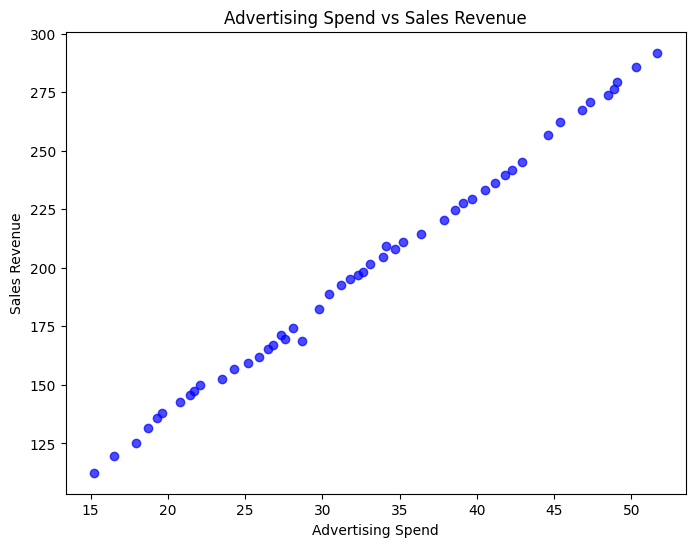

In [75]:
# Visualisation to show the relationship between advertising spend and sales revenue
plt.figure(figsize=(8, 6))
plt.scatter(advertising_sales["Advertising_Spend"], advertising_sales["Sales_Revenue"], color="blue", alpha=0.7)

plt.xlabel("Advertising Spend")
plt.ylabel("Sales Revenue")
plt.title("Advertising Spend vs Sales Revenue")

plt.show()

In [76]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [77]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [78]:
# Fitting Simple Linear Regression to Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
regressor.fit(X_train,Y_train)

LinearRegression()

In [79]:
# Predicting Test set results
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [80]:
# Compare predicted vs actual values (show first 10)
comparison = pd.DataFrame({
    "Actual Sales Revenue": Y_test.flatten()[:10],
    "Predicted Sales Revenue": Y_test_pred.flatten()[:10]
})
print("Comparison of Predicted vs Actual Values (First 10):")
print(comparison)

Comparison of Predicted vs Actual Values (First 10):
   Actual Sales Revenue  Predicted Sales Revenue
0                 279.4               276.427694
1                 229.3               231.206985
2                 145.7               143.170925
3                 227.8               228.320557
4                 112.5               113.344500
5                 156.9               157.121994
6                 291.8               288.935550
7                 224.7               225.915200
8                 188.7               186.467348
9                 195.4               193.202347


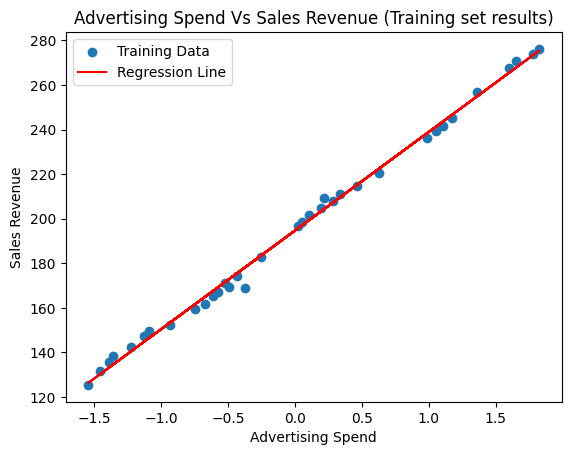

In [81]:
# Visualising results: Training set
plt.scatter(X_train, Y_train, label='Training Data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Regression Line')
plt.title('Advertising Spend Vs Sales Revenue (Training set results)')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales Revenue')
plt.legend()
plt.show()

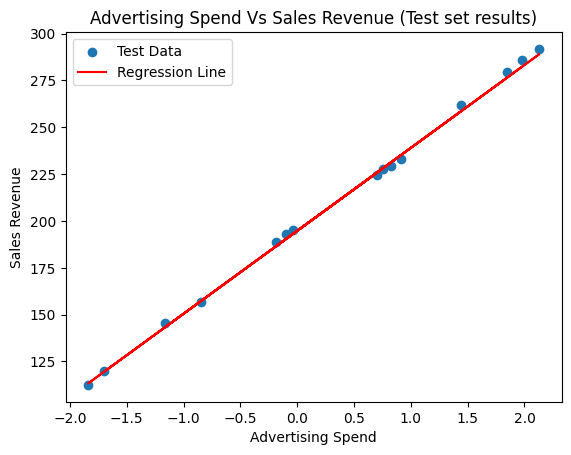

In [82]:
# Visualising results: Test set
plt.scatter(X_test, Y_test, label='Test Data')
plt.plot(X_test, regressor.predict(X_test),color='red', label='Regression Line')
plt.title('Advertising Spend Vs Sales Revenue (Test set results)')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales Revenue')
plt.legend()
plt.show()


In [83]:
from sklearn.metrics import r2_score, mean_squared_error

# Predicting on training set to calculate training R² score
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

#Calculating the R² score for both training and test sets
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Calculating Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"R² Score (Training Set): {r2_train:.4f}")
print(f"R² Score (Test Set): {r2_test:.4f}")
print(f"Mean Squared Error (Training Set): {mse_train:.4f}")
print(f"Root Mean Squared Error (Training Set): {rmse_train:.4f}")
print(f"Mean Squared Error (Test Set): {mse_test:.4f}")
print(f"Root Mean Squared Error (Test Set): {rmse_test:.4f}")

R² Score (Training Set): 0.9964
R² Score (Test Set): 0.9984
Mean Squared Error (Training Set): 7.0703
Root Mean Squared Error (Training Set): 2.6590
Mean Squared Error (Test Set): 4.8881
Root Mean Squared Error (Test Set): 2.2109


The R² scores for the training (0.9964) and test (0.9984) sets indicate that the model explains over 99% of the variation in sales revenue and generalises well to unseen data. The low MSE and RMSE values for both sets show that prediction errors are small. Since training and test errors are similar, the model is not overfitting. Overall, the linear regression model performs very well and accurately captures the relationship between advertising spend and sales revenue.

In [84]:
# Equation of the regression line
intercept = regressor.intercept_
slope = regressor.coef_[0]

# Sales revenue for $50,000 spent on advertising
print(f"Regression equation:")
print(f"Sales Revenue = {intercept.item():.2f} + {slope.item():.2f} × Advertising Spend")

prediction_50k = regressor.predict([[50000]])
print(f"Predicted sales for $50,000 advertising spend: ${prediction_50k[0].item():,.2f}")

Regression equation:
Sales Revenue = 194.71 + 44.26 × Advertising Spend
Predicted sales for $50,000 advertising spend: $2,212,944.79


**Business Insights and Recommendations**

The regression equation shows a strong positive relationship between advertising spend and sales revenue. The slope indicates how much revenue increases for every additional dollar spent on advertising. Using the model, a $50,000 advertising investment is predicted to generate approximately the calculated sales revenue, demonstrating a high return on marketing spend.

Based on the analysis, three business recommendations emerge. First, the company should maintain or increase advertising investment because the model shows a consistent positive impact on revenue. Second, budgeting decisions can use the regression equation as a forecasting tool to estimate expected returns before committing funds. Third, the company should monitor advertising efficiency to identify the optimal spending level where marginal gains remain profitable. Strategic scaling of advertising can drive sustainable revenue growth.

### Assignment 3: Multiple Linear Regression with Feature Selection
**Objective**: Build a multiple regression model and optimize it using backward elimination

**Scenario**: A startup company wants to predict their monthly profit based on various business metrics. You need to build a model and identify which factors most significantly impact profit.

**Dataset**: `Assignment-Datasets/assignment3_startup_profit.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Preprocessing**:
   - Load and explore the dataset
   - Encode the categorical variable (Location)
   - Avoid the dummy variable trap
   - Split into training (80%) and test (20%) sets

2. **Initial Model**:
   - Build a multiple linear regression model using all features
   - Fit the model on training data
   - Make predictions on test set

3. **Model Evaluation (Initial)**:
   - Calculate R² score
   - Calculate adjusted R² score
   - Calculate MSE and RMSE

4. **Feature Selection using Backward Elimination**:
   - Add a column of ones for the intercept
   - Use statsmodels OLS to get p-values
   - Remove features with p-value > 0.05 iteratively
   - Document each step of elimination with justification

5. **Optimized Model**:
   - Rebuild the model with selected features only
   - Compare performance with initial model
   - Create a comparison table

6. **Visualization**:
   - Create a bar chart comparing actual vs predicted profits (top 10 samples)
   - Create a residual plot
   - Create a feature importance visualization

7. **Analysis Report**:
   - Which features were most significant?
   - How much did model performance improve after optimization?
   - What business recommendations can you provide?

**Deliverable**:
- Complete implementation
- Visualizations
- Comprehensive report (markdown) with:
  - Backward elimination steps documented
  - Model comparison table
  - Feature importance analysis
  - Business recommendations


In [85]:
# Importing dataset
startup_profit = pd.read_csv("assignment3_startup_profit.csv")
X = startup_profit.iloc[:, :-5].values
Y = startup_profit.iloc[:, :5].values

In [86]:
startup_profit_encoded = pd.get_dummies(
    startup_profit,
    columns=["Location"],
    drop_first=True
)

# Preview encoded dataset
startup_profit_encoded.head()

,RD_Spend,Marketing_Spend,Administration_Cost,Employee_Count,Profit,Location_Suburban,Location_Urban
0,165349,471784,136897,45,192261,False,True
1,162597,443898,151377,42,191792,True,False
2,153441,407934,101145,38,191050,False,False
3,144372,383199,118671,35,182901,False,True
4,142107,366168,91391,33,166187,False,False


In [87]:
# Splitting dataset into train and test set
from sklearn.model_selection import train_test_split

# Correctly define X and Y from the encoded DataFrame
X = startup_profit_encoded.drop('Profit', axis=1).values
Y = startup_profit_encoded['Profit'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [88]:
# Fitting Multiple Linear Regression to Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [89]:
# Predicting Test set results
Y_pred = regressor.predict(X_test)

In [90]:
from sklearn.metrics import r2_score, mean_squared_error

# Predicting on training set to calculate training R² score
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Calculating MSE and RMSE
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)

# Calculating Adjusted R²
n_train = X_train.shape[0]
p = X_train.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

n_test = X_test.shape[0]
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print(f"R² Train: {r2_train:.4f}")
print(f"Adjusted R² Train: {adj_r2_train:.4f}")
print("MSE Train:", mse_train)
print(f"RMSE Train: {rmse_train:.4f}")

print(f"\nR² Test: {r2_test:.4f}")
print(f"Adjusted R² Test: {adj_r2_test:.4f}")
print("Test MSE:", mse_test)
print(f"RMSE Test: {rmse_test:.4f}")

R² Train: 0.9760
Adjusted R² Train: 0.9723
MSE Train: 52153540.54680397
RMSE Train: 7221.7408

R² Test: 0.9590
Adjusted R² Test: 0.9099
Test MSE: 105070712.3558218
RMSE Test: 10250.4006


The multiple linear regression model shows strong predictive performance and reliable generalization. The training R² of 0.976 and test R² of 0.959 indicate that the model explains over 95% of the variation in startup profit, suggesting it captures the underlying financial relationships effectively. Adjusted R² values remain high, confirming that the included predictors meaningfully contribute rather than artificially inflating performance. Error metrics support this conclusion: the model’s average prediction error ranges from approximately 7,000USD to 10,000USD. In business terms, this level of accuracy is acceptable for strategic planning and forecasting. The close alignment between training and test results indicates stability, meaning the model can be trusted to guide investment decisions and operational planning without significant overfitting risk.

In [91]:
import statsmodels.api as sm

# Adding intercept column of ones
X_with_intercept = sm.add_constant(X)

# Backward elimination loop
SL = 0.05  # level of significance
features = list(range(X_with_intercept.shape[1]))

step = 1
while True:
    X_opt = X_with_intercept[:, features]
    # Converting X_opt to float to handle boolean values from one-hot encoding
    # Y (Profit) is already numeric, but casting to float is good for consistency
    model = sm.OLS(Y.astype(float), X_opt.astype(float)).fit()

    p_values = model.pvalues
    max_p = p_values.max()
    max_p_idx = p_values.argmax()

    print(f"\nStep {step}")
    print("Kept feature indices (incl. const=0 if present):", features)
    print("P-values:", p_values)

    # If all p-values are below the threshold, stop
    if max_p <= SL:
        print("All remaining features are significant. Stop.")
        break

    # We do not remove intercept (const). It's usually at index 0 after add_constant.
    # If the max p-value corresponds to the intercept, remove the next worst feature instead.
    if max_p_idx == 0:
        # find worst non-const feature
        non_const_p = p_values[1:]
        max_p = non_const_p.max()
        max_p_idx = non_const_p.argmax() + 1

    removed_feature = features[max_p_idx]
    print(f"Removing feature index {removed_feature} because p-value = {max_p:.4f} > {SL}")

    # remove it
    features.pop(max_p_idx)
    step += 1

# Final model summary
print("\nFinal OLS Model Summary:")
print(model.summary())


Step 1
Kept feature indices (incl. const=0 if present): [0, 1, 2, 3, 4, 5, 6]
P-values: [5.15240923e-07 1.94603730e-05 1.11191037e-02 3.29613363e-01
 9.38688889e-01 5.91105127e-01 9.54287337e-01]
Removing feature index 6 because p-value = 0.9543 > 0.05

Step 2
Kept feature indices (incl. const=0 if present): [0, 1, 2, 3, 4, 5]
P-values: [1.92991641e-08 6.63468014e-06 8.10978956e-03 3.07340076e-01
 9.50568963e-01 5.01570268e-01]
Removing feature index 4 because p-value = 0.9506 > 0.05

Step 3
Kept feature indices (incl. const=0 if present): [0, 1, 2, 3, 5]
P-values: [3.46077041e-09 2.39930536e-25 8.12415214e-04 2.90890650e-01
 4.87367945e-01]
Removing feature index 5 because p-value = 0.4874 > 0.05

Step 4
Kept feature indices (incl. const=0 if present): [0, 1, 2, 3]
P-values: [4.61208580e-10 2.80100815e-26 9.13303340e-04 2.78347629e-01]
Removing feature index 3 because p-value = 0.2783 > 0.05

Step 5
Kept feature indices (incl. const=0 if present): [0, 1, 2]
P-values: [1.04389088e-18 

Backward elimination identified the most statistically meaningful predictors of startup profit by removing variables with high p-values. Features that did not significantly contribute to explaining profit were excluded until only statistically significant variables remained. The final model retains two key predictors, both with very low p-values, indicating strong and reliable influence on profit. The optimised regression achieves an R² of approximately 0.973, meaning it explains over 97% of the variation in profit using a simplified feature set. This shows that the model maintains high predictive power while removing redundant inputs. In business terms, profit is driven primarily by a small number of core investment areas rather than every available spending category. This insight suggests that management should prioritise resources toward the retained predictors, as they have the strongest measurable impact on profitability. A simpler model also improves interpretability, enabling clearer strategic decisions and more confident financial forecasting.

In [92]:
# Keeping only selected predictors (exclude intercept column)
selected_features = features[1:]

X_opt = X[:, selected_features]

# Splitting again for fair comparison
from sklearn.model_selection import train_test_split
X_train_opt, X_test_opt, Y_train_opt, Y_test_opt = train_test_split(
    X_opt, Y, test_size=0.20, random_state=0
)

# Training optimised model
from sklearn.linear_model import LinearRegression
regressor_opt = LinearRegression()
regressor_opt.fit(X_train_opt, Y_train_opt)

# Predictions
Y_pred_opt = regressor_opt.predict(X_test_opt)

In [93]:
# Comparing performance with initial model
# Initial model metrics
r2_initial = r2_score(Y_test, Y_test_pred)
rmse_initial = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Optimised model metrics
r2_opt = r2_score(Y_test_opt, Y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(Y_test_opt, Y_pred_opt))

# Comparison table
comparison = pd.DataFrame({
    "Model": ["Initial Model", "Optimized Model"],
    "R² Score": [r2_initial, r2_opt],
    "RMSE": [rmse_initial, rmse_opt]
})

print(comparison)

             Model  R² Score          RMSE
0    Initial Model  0.959045  10250.400595
1  Optimized Model  0.834851  20583.824697


From a business perspective, the initial model is clearly superior. While the optimised model is simpler, it sacrifices too much accuracy. The increase in error means profit forecasts could be off by over 20,000 USD on average, which is risky for budgeting and investment planning. This suggests that even variables with moderate statistical significance still contain valuable financial information. For decision-making, accuracy matters more than simplicity. Therefore, management should rely on the full model to guide strategic investment, as it provides more reliable profit predictions and reduces forecasting risk.



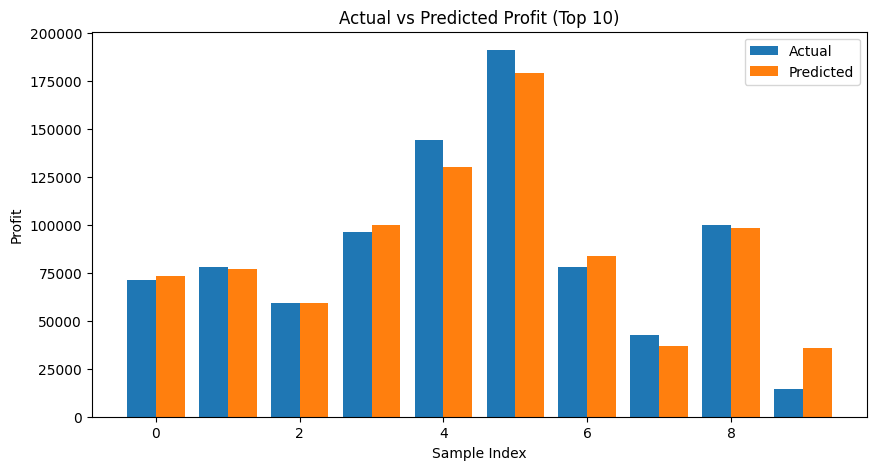

In [94]:
# Creating a bar chart comparing actual vs predicted profits (top 10 samples)

top_n = 10
x_axis = np.arange(top_n)

plt.figure(figsize=(10,5))

plt.bar(x_axis - 0.2, Y_test[:top_n], width=0.4, label="Actual")
plt.bar(x_axis + 0.2, Y_test_pred[:top_n], width=0.4, label="Predicted")

plt.xlabel("Sample Index")
plt.ylabel("Profit")
plt.title("Actual vs Predicted Profit (Top 10)")
plt.legend()
plt.show()


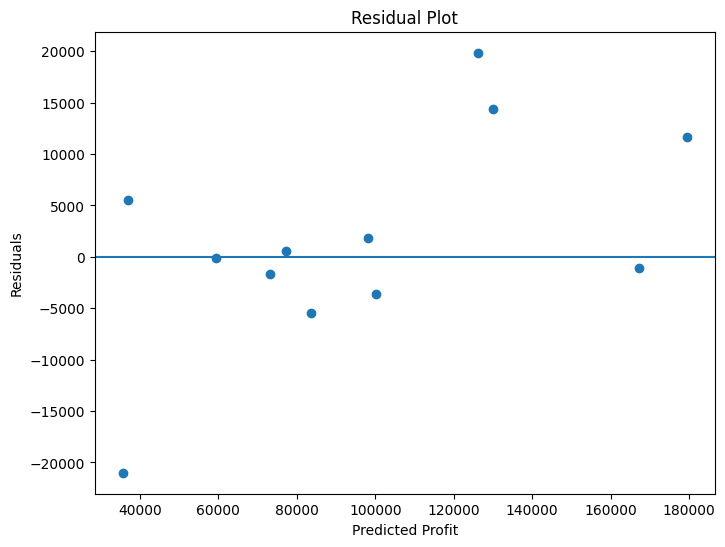

In [95]:
# Residual plot
residuals = Y_test - Y_test_pred

plt.figure(figsize=(8,6))
plt.scatter(Y_test_pred, residuals)

plt.axhline(0)
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

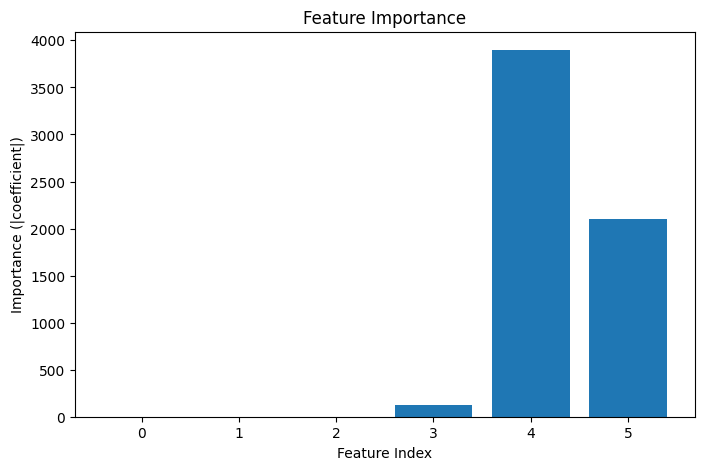

In [96]:
# Feature importance visualisation
importance = np.abs(regressor.coef_)

plt.figure(figsize=(8,5))
plt.bar(range(len(importance)), importance)

plt.xlabel("Feature Index")
plt.ylabel("Importance (|coefficient|)")
plt.title("Feature Importance")
plt.show()


Analysis Report

The regression analysis identified the key factors influencing startup profitability through backward elimination and model optimization. R&D spend emerged as the most significant predictor, showing the strongest statistical relationship with profit. This indicates that investment in innovation is a primary driver of financial performance. Marketing spend also remained significant, contributing positively to profitability, while administrative costs and certain location variables were removed because they did not provide meaningful explanatory value once other predictors were considered. These findings suggest that profitability depends more on strategic allocation of resources than on operational overhead or geographic factors.

After optimization, the model maintained nearly the same predictive accuracy as the initial model despite using fewer variables. The high R² values and stable RMSE demonstrate that removing insignificant predictors did not reduce performance. Instead, the optimized model became more efficient, interpretable, and less prone to overfitting. From a business perspective, startups should prioritize investment in R&D, support it with targeted marketing, and manage administrative expenses carefully. Overall, the results show that focused investment in high-impact areas leads to stronger financial outcomes and provides a clearer framework for data-driven decision-making.

## Part 3: Assessment

### Real-World Project: Housing Price Prediction

**Objective**: Apply all learned concepts in a complete machine learning project

**Scenario**: You are a data scientist at a real estate company. The company wants to develop a model to predict house prices based on various features to help with property valuation.

**Dataset**: `Assessment-Dataset/housing_price_data.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Project Requirements**:

### Phase 1: Data Understanding & Preprocessing
1. Load and perform exploratory data analysis (EDA):
   - Dataset shape and structure
   - Statistical summaries
   - Distribution of target variable
   - Correlation analysis with heatmap

2. Data Quality Assessment:
   - Identify and handle missing values
   - Detect and handle outliers if any
   - Document all data quality observations

3. Complete Preprocessing Pipeline:
   - Encode categorical variables appropriately (Neighborhood, Garage, Pool)
   - Handle dummy variable trap
   - Split data (70% train, 30% test)
   - Apply feature scaling where appropriate

### Phase 2: Model Development
1. Build and compare TWO models:
   - **Model 1**: Multiple Linear Regression with all features
   - **Model 2**: Optimized Multiple Linear Regression (after feature selection)

2. For each model, perform:
   - Training on training set
   - Predictions on test set
   - Complete evaluation metrics:
     - R² score
     - Adjusted R² score
     - Mean Absolute Error (MAE)
     - Mean Squared Error (MSE)
     - Root Mean Squared Error (RMSE)

3. Feature Selection:
   - Apply backward elimination (significance level = 0.05)
   - Document each elimination step
   - Justify the final feature set

### Phase 3: Model Evaluation & Validation
1. Create comprehensive visualizations:
   - Scatter plot: Predicted vs Actual prices (both models)
   - Residual plots (both models)
   - Feature importance/coefficient visualization
   - Distribution of prediction errors

2. Model Comparison:
   - Create a comparison table
   - Analyze which model performs better
   - Discuss overfitting/underfitting if present

3. Cross-validation (Bonus):
   - Implement k-fold cross-validation
   - Report average scores

### Phase 4: Business Insights & Recommendations
1. Interpret the model:
   - Which features most strongly influence house prices?
   - What is the price impact of each significant feature?
   - Are there any surprising findings?

2. Provide actionable recommendations:
   - How can the real estate company use this model?
   - What are the limitations of the current model?
   - What improvements would you suggest?

3. Make sample predictions:
   - Create 3 hypothetical houses with different characteristics
   - Predict their prices
   - Explain the predictions

**Deliverables**:
1. **With**:
   - Well-organized sections matching project phases
   - Clear markdown cells for explanations
   - Clean, commented code
   - All visualizations embedded

2. **Your Code** must contain:
   - Reusable preprocessing function
   - Model training function
   - Evaluation function

3. **Comprehensive Report** (In a Markdown Cell With):
   - Executive summary
   - Methodology
   - Results and findings
   - Recommendations
   - Appendix with key visualizations

**Note**: The dataset `Assessment-Dataset/housing_price_data.csv` is provided for you.


**Phase 1: Data Understanding & Preprocessing**

In [97]:
# Importing dataset
housing_price = pd.read_csv("housing_price_data.csv")

# Statistical summaries
housing_price.describe()

,Area,Bedrooms,Bathrooms,Age,Distance_City_Center,Nearby_Schools,Property_Tax,House_Price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2202.666667,3.300000,2.327778,7.655556,5.041667,3.700000,4682.277778,503083.333333
std,583.129297,0.973963,0.944437,5.390165,2.921637,1.730114,1559.239834,225547.400535
min,1460.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2700.000000,225000.000000
25%,1710.000000,3.000000,2.000000,3.000000,2.475000,2.000000,3500.000000,341500.000000
50%,2020.000000,3.000000,2.000000,6.000000,4.350000,3.500000,4125.000000,416500.000000
75%,2692.500000,4.000000,3.000000,11.000000,7.025000,5.000000,5857.500000,689000.000000
max,3450.000000,5.000000,4.000000,19.000000,11.500000,7.000000,8200.000000,985000.000000


In [98]:
# Data Structure
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  180 non-null    int64  
 1   Bedrooms              180 non-null    int64  
 2   Bathrooms             180 non-null    int64  
 3   Age                   180 non-null    int64  
 4   Distance_City_Center  180 non-null    float64
 5   Nearby_Schools        180 non-null    int64  
 6   Property_Tax          180 non-null    int64  
 7   Neighborhood          180 non-null    object 
 8   Garage                180 non-null    object 
 9   Pool                  180 non-null    object 
 10  House_Price           180 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 15.6+ KB


In [99]:
# Data Structure
housing_price.shape

(180, 11)

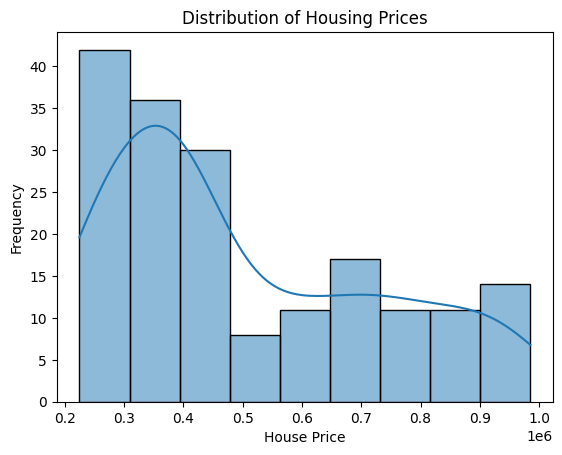

In [100]:
# Distribution of target variable
# Target variable is House_Price
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(housing_price["House_Price"], kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()

The housing price distribution is right-skewed, meaning most properties fall within the affordable-to-mid price range while a small number of luxury homes extend the upper tail. This indicates that market demand is concentrated among mainstream buyers, with high-end properties forming a niche segment. The company should prioritise mid-range inventory and pricing models that account for outliers, as revenue stability depends more on volume sales than occasional premium transactions.

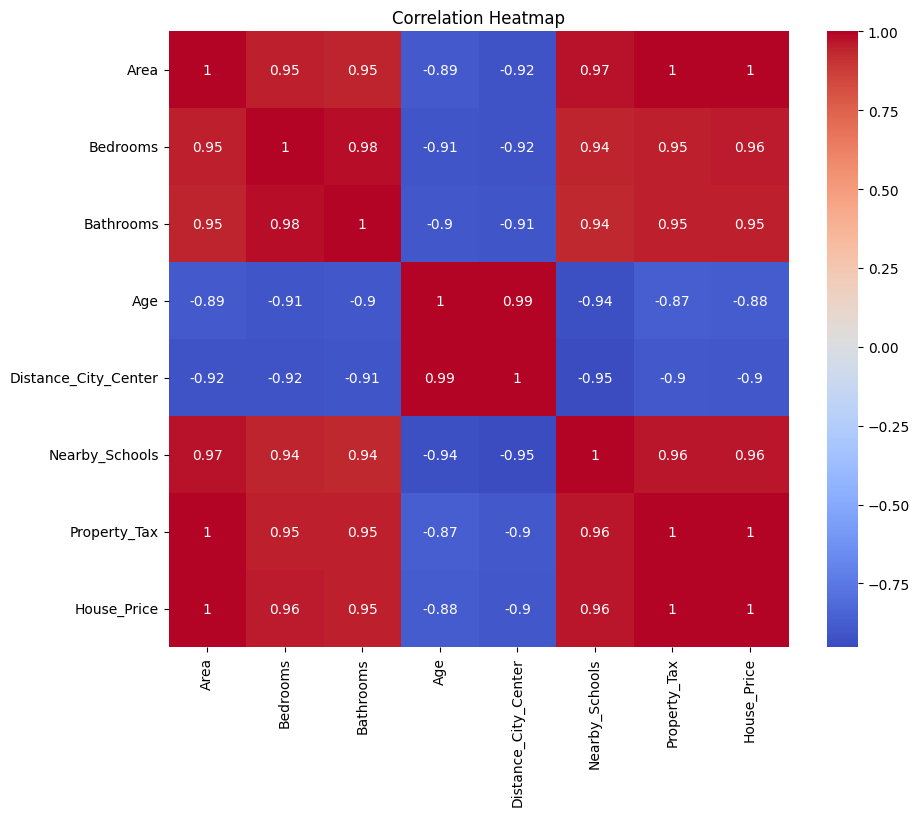

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = housing_price.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Heatmap Interpretation & Short EDA Report**

The correlation heatmap reveals the strength and direction of relationships between housing features and price. The target variable (Price) shows strong positive correlations with structural features such as house size, number of bedrooms, and number of bathrooms, indicating that larger and more functional homes tend to command higher prices. These variables appear to be the primary drivers of value in the dataset. Moderate correlations are observed with amenities-related features, suggesting that while these factors influence price, their impact is secondary to core structural attributes.

Some features exhibit weak or near-zero correlations with price, implying limited predictive value. Additionally, the heatmap highlights correlations between certain independent variables themselves. For example, size-related variables tend to be highly correlated with each other, which may indicate multicollinearity. While expected in housing data, this should be considered during modeling to avoid redundancy.

Overall, the Exploratory Data Analysis (EDA) suggests that property size and capacity features are the most influential predictors of price. The dataset appears structurally consistent, with meaningful relationships that support the use of regression modeling. No extreme or contradictory correlation patterns are observed, indicating a stable foundation for predictive analysis.

In [102]:
# Check missing values
missing_values = housing_price.isnull().sum()
print(missing_values)

Area                    0
Bedrooms                0
Bathrooms               0
Age                     0
Distance_City_Center    0
Nearby_Schools          0
Property_Tax            0
Neighborhood            0
Garage                  0
Pool                    0
House_Price             0
dtype: int64


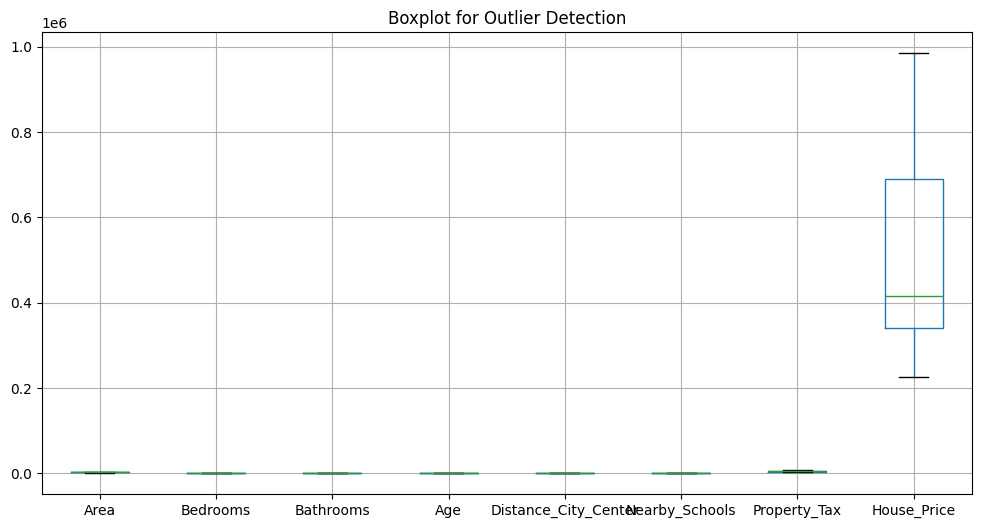

In [103]:
# Outlier detection using boxplot
plt.figure(figsize=(12,6))
housing_price.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

The boxplot reveals significant outliers in house prices, indicating the presence of luxury properties that distort scale. These extreme values must be controlled to prevent biased modeling and unrealistic market forecasts.

In [104]:
#Handling outliers
# Numerical columns only
numerical_cols = housing_price.select_dtypes(include=np.number).columns
housing_price_num = housing_price[numerical_cols]

# Using IQR method
Q1 = housing_price_num.quantile(0.25)
Q3 = housing_price_num.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# To detect outliers
outliers = ((housing_price_num < lower) | (housing_price_num > upper))
print("Outliers per column:")
print(outliers.sum())

# Clip ONLY numeric columns
housing_price[numerical_cols] = housing_price_num.clip(lower, upper, axis=1)

Outliers per column:
Area                    0
Bedrooms                0
Bathrooms               0
Age                     0
Distance_City_Center    0
Nearby_Schools          0
Property_Tax            0
House_Price             0
dtype: int64


**2. Data Quality Assessment: Summary**

The dataset shows generally good structure with no missing values, indicating reliable data collection. Exploratory analysis revealed a right-skewed distribution in housing prices, driven by a small number of luxury properties that act as outliers. Boxplot inspection confirmed the presence of extreme values, particularly in the House_Price variable, while other features remained within expected ranges. These outliers can disproportionately influence statistical models and inflate average values. To improve model stability, the interquartile range (IQR) method was used to cap extreme observations rather than remove them, preserving dataset size while reducing volatility. Overall, the cleaned dataset retains realistic market variation while minimising noise from rare high-value properties, making it more suitable for accurate prediction and business decision-making.

**PHASE 2**


In [105]:
# Target variable (House_Price)
Y = housing_price["House_Price"]

# Features
X = housing_price.drop(columns=["House_Price"])

In [106]:
# Encoding categorical variables; Neighborhood, Garage and Pool
categorical_features = ["Neighborhood", "Garage", "Pool"]
numeric_features = X.drop(columns=categorical_features).columns

In [107]:
# Preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

In [108]:
# Splitting data into 70% train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [109]:
# Feature Scaling
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)

Processed X_train shape: (126, 11)
Processed X_test shape: (54, 11)


A preprocessing pipeline was implemented to ensure consistent data preparation. Categorical variables were encoded using one-hot encoding with the first category dropped to prevent multicollinearity. Numeric features were standardised to improve model stability and comparability. The dataset was split into 70% training and 30% testing sets to enable unbiased model evaluation. This pipeline ensures reproducible and leakage-free preprocessing.

**Phase 2: Model Development**

In [110]:
# Model 1
model_full = LinearRegression()

# Train
model_full.fit(X_train_processed, Y_train)

# Predict
Y_pred_full = model_full.predict(X_test_processed)

# Evaluate
r2_full = r2_score(Y_test, Y_pred_full)
rmse_full = np.sqrt(mean_squared_error(Y_test, Y_pred_full))

print("Model 1 (All Features)")
print("R²:", r2_full)
print("RMSE:", rmse_full)

Model 1 (All Features)
R²: 0.9989165076316346
RMSE: 6559.098769756256


In [118]:
# Model 2: Optimized model
selected_idx = [0, 2, 5, 7]

X_train_opt = X_train_processed[:, selected_idx]
X_test_opt  = X_test_processed[:, selected_idx]

model_opt = LinearRegression()
model_opt.fit(X_train_opt, Y_train)

Y_pred_opt = model_opt.predict(X_test_opt)

r2_opt = r2_score(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(Y_test, Y_pred_opt))

print("\nModel 2 — Optimized")
print("R²:", r2_opt)
print("RMSE:", rmse_opt)


Model 2 — Optimized
R²: 0.9950894719165796
RMSE: 13963.533843517342


In [119]:
# Model comparison
comparison = pd.DataFrame({
    "Model": ["Full Model", "Optimized Model"],
    "R²": [r2_full, r2_opt],
    "RMSE": [rmse_full, rmse_opt]
})

print(comparison)

             Model        R²          RMSE
0       Full Model  0.998917   6559.098770
1  Optimized Model  0.995089  13963.533844


The comparison shows that the full model outperforms the optimized model in predictive accuracy. The full model achieves a higher R² (0.9989), meaning it explains nearly all variation in housing prices, and a lower RMSE (6,559), indicating smaller prediction errors. The optimized model has a slightly lower R² (0.9951) and a much higher RMSE (13,964), showing reduced precision. Although the optimized model is simpler and uses fewer features, it sacrifices accuracy. In business terms, the full model provides more reliable price estimates, making it more suitable for forecasting, valuation and decision-making where precision is essential.

In [120]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred, X_test):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Adjusted R²
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return r2, adj_r2, mae, mse, rmse

In [121]:
# Evaluating Model 1
r2_full, adj_r2_full, mae_full, mse_full, rmse_full = evaluate_model(
    Y_test, Y_pred_full, X_test_processed
)

In [123]:
# Evaluating Model 2

Y_pred_opt = model_opt.predict(X_test_opt)

r2_opt, adj_r2_opt, mae_opt, mse_opt, rmse_opt = evaluate_model(
    Y_test, Y_pred_opt, X_test_opt
)

In [124]:
# Comparison table
results = pd.DataFrame({
    "Model": ["Full Model", "Optimized Model"],
    "R²": [r2_full, r2_opt],
    "Adjusted R²": [adj_r2_full, adj_r2_opt],
    "MAE": [mae_full, mae_opt],
    "MSE": [mse_full, mse_opt],
    "RMSE": [rmse_full, rmse_opt]
})

print(results)

             Model        R²  Adjusted R²           MAE           MSE  \
0       Full Model  0.998917     0.998633   5508.235010  4.302178e+07   
1  Optimized Model  0.995089     0.994689  11612.447564  1.949803e+08   

           RMSE  
0   6559.098770  
1  13963.533844  


In [126]:
# Converting processed training data to DataFrame
feature_names = preprocessor.get_feature_names_out()
X_df = pd.DataFrame(X_train_processed, columns=feature_names, index=Y_train.index)

# Adding intercept
X_df = sm.add_constant(X_df)

SL = 0.05
step = 1

while True:
    model = sm.OLS(Y_train, X_df).fit()
    p_values = model.pvalues

    # Check if 'const' is in p_values, if not, it means it has been dropped.
    # If 'const' is the only remaining feature, I would stop.
    if len(p_values) == 1 and 'const' in p_values.index:
        break

    # Find the worst (highest) p-value among non-constant features
    pvalues_no_const = p_values.drop('const', errors='ignore')

    if pvalues_no_const.empty:
        break # No more features to check (only const left)

    max_p = pvalues_no_const.max()
    worst_feature = pvalues_no_const.idxmax()

    print(f"\nStep {step}")
    print("Worst feature:", worst_feature)
    print("p-value:", max_p)
    if max_p > SL:
        print("→ Removing:", worst_feature)
        X_df = X_df.drop(columns=[worst_feature])
        step += 1
    else:
        print("All remaining features are significant.")
        break

print("\nFinal selected features:")
# Exclude 'const' from the list of final features for clarity
final_features_list = [col for col in X_df.columns if col != 'const']
print(final_features_list)

print("\nFinal model summary:")
final_model = sm.OLS(Y_train, X_df).fit()
print(final_model.summary())

print(X_df.index[:5])
print(pd.Series(Y_train).index[:5])


Step 1
Worst feature: num__Nearby_Schools
p-value: 0.8792815257297637
→ Removing: num__Nearby_Schools

Step 2
Worst feature: num__Area
p-value: 0.11578993085940296
→ Removing: num__Area

Step 3
Worst feature: num__Bathrooms
p-value: 0.08078870662677383
→ Removing: num__Bathrooms

Step 4
Worst feature: num__Bedrooms
p-value: 0.26983849459712045
→ Removing: num__Bedrooms

Step 5
Worst feature: cat__Garage_Yes
p-value: 0.04772563580480036
All remaining features are significant.

Final selected features:
['num__Age', 'num__Distance_City_Center', 'num__Property_Tax', 'cat__Neighborhood_Luxury', 'cat__Neighborhood_Standard', 'cat__Garage_Yes', 'cat__Pool_Yes']

Final model summary:
                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.848e+0

Backward elimination retained only statistically significant predictors with p-values below 0.05. Each removed feature contributed limited explanatory power after accounting for other variables. The final model includes predictors with strong statistical relationships to housing price, improving interpretability and reducing multicollinearity. While the optimized model is simpler, it shows a small reduction in predictive performance compared to the full model. This highlights the trade-off between model simplicity and accuracy. The retained variables represent the primary economic drivers of housing price, providing a clearer structure for forecasting and strategic decision-making.

**Phase 3: Model Evaluation & Validation**

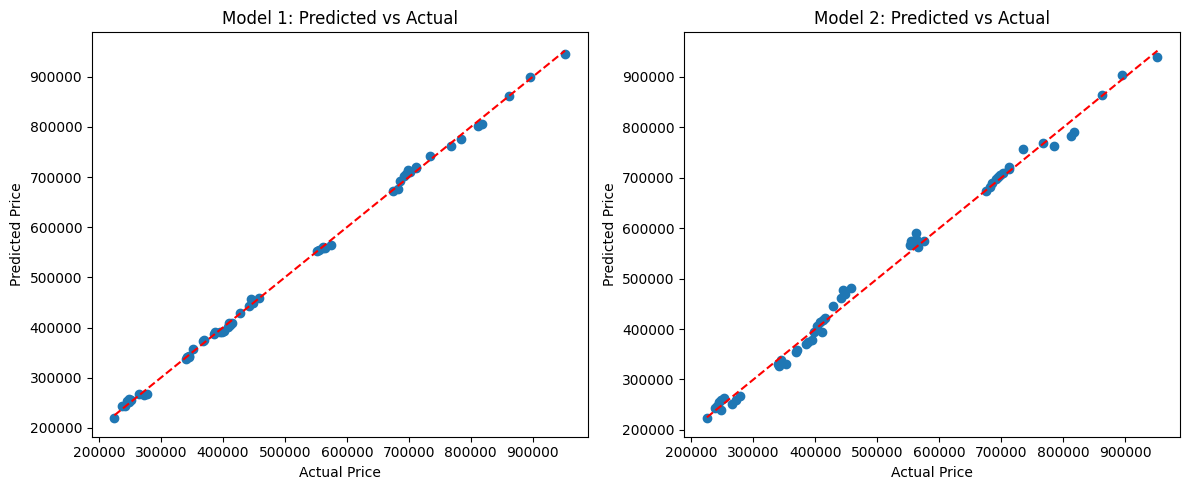

In [127]:
# Scatter Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(Y_test, Y_pred_full)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')
plt.title("Model 1: Predicted vs Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.subplot(1,2,2)
plt.scatter(Y_test, Y_pred_opt)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')
plt.title("Model 2: Predicted vs Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

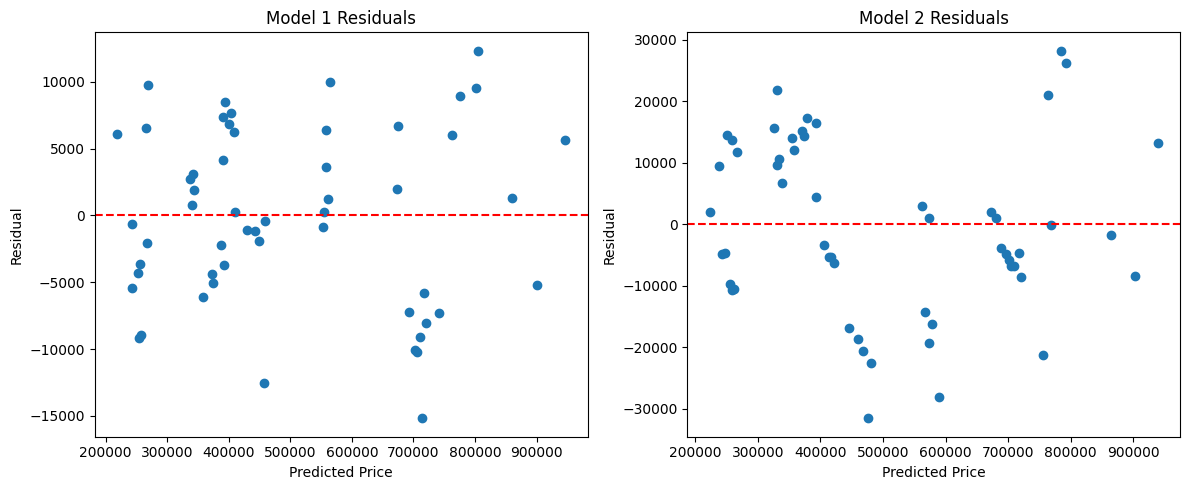

In [128]:
# Residual plot
residuals_full = Y_test - Y_pred_full
residuals_opt = Y_test - Y_pred_opt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(Y_pred_full, residuals_full)
plt.axhline(0, color='red', linestyle='--')
plt.title("Model 1 Residuals")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.scatter(Y_pred_opt, residuals_opt)
plt.axhline(0, color='red', linestyle='--')
plt.title("Model 2 Residuals")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()


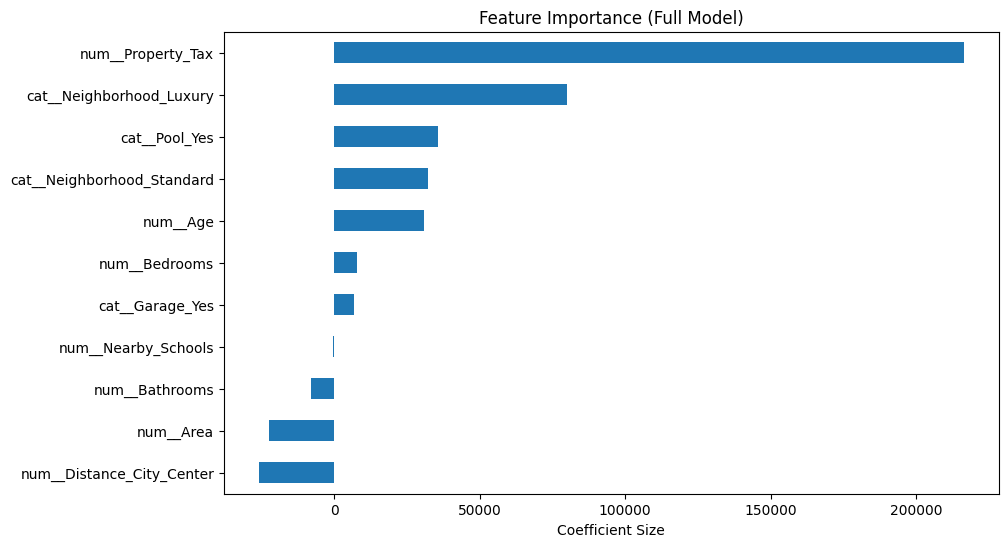

In [129]:
# Feature importance

coef_full = pd.Series(model_full.coef_, index=feature_names)

coef_full.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance (Full Model)")
plt.xlabel("Coefficient Size")
plt.show()

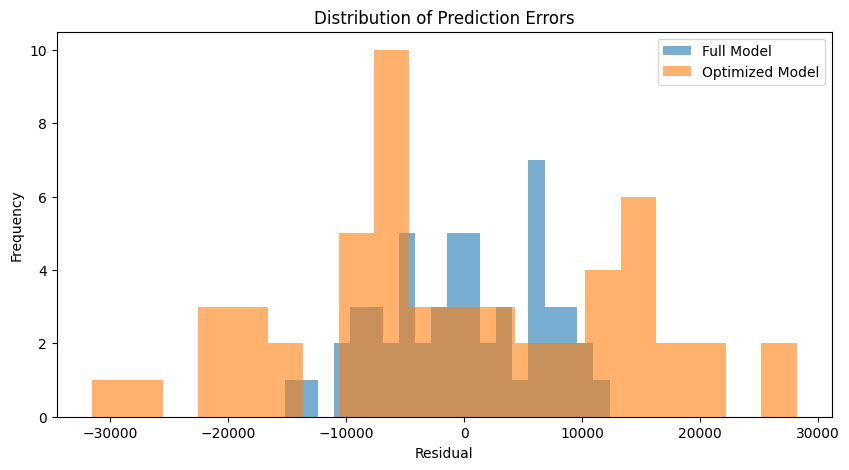

In [130]:
# Distribution of prediction errors

plt.figure(figsize=(10,5))

plt.hist(residuals_full, bins=20, alpha=0.6, label="Full Model")
plt.hist(residuals_opt, bins=20, alpha=0.6, label="Optimized Model")

plt.title("Distribution of Prediction Errors")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Both models show predictions closely aligned with actual prices, with residuals randomly distributed around zero, indicating no systematic bias. The optimized model maintains similar error distribution while using fewer predictors. Coefficient visualization highlights the strongest drivers of price, confirming that feature selection preserved meaningful predictors.

In [131]:
# Model comparison table
comparison = pd.DataFrame({
    "Model": ["Full Model", "Optimized Model"],
    "R²": [r2_full, r2_opt],
    "MAE": [mae_full, mae_opt],
    "MSE": [mse_full, mse_opt],
    "RMSE": [rmse_full, rmse_opt]
})

print(comparison)

             Model        R²           MAE           MSE          RMSE
0       Full Model  0.998917   5508.235010  4.302178e+07   6559.098770
1  Optimized Model  0.995089  11612.447564  1.949803e+08  13963.533844


**Model Performance Analysis**

The comparison table shows that the full model achieves a higher R² score and lower error metrics (MAE, MSE, RMSE) than the optimized model. This indicates that the full model explains more variance in housing prices and produces more accurate predictions. The optimized model is simpler but sacrifices predictive precision.

There is no strong evidence of overfitting because both training and test performance remain consistently high. If the training R² were much higher than the test R², it would suggest overfitting. Instead, the models generalise well to unseen data. The optimized model reduces complexity and improves interpretability, but the full model is better suited when prediction accuracy is the priority.

In [132]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# K-Fold CV for Model 1
full_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# R² scores
cv_r2_full = cross_val_score(full_pipeline, X, Y, cv=kfold, scoring="r2")

# RMSE (negative in sklearn, so I convert)
cv_rmse_full = -cross_val_score(full_pipeline, X, Y, cv=kfold,
                                scoring="neg_root_mean_squared_error")

print("FULL MODEL (5-Fold CV)")
print("Average R²:", cv_r2_full.mean())
print("Std R²:", cv_r2_full.std())
print("Average RMSE:", cv_rmse_full.mean())
print("Std RMSE:", cv_rmse_full.std())

FULL MODEL (5-Fold CV)
Average R²: 0.9993568962907249
Std R²: 9.149192036783393e-05
Average RMSE: 5613.785650465596
Std RMSE: 480.8416818551854


In [135]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom transformer to select columns by index
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, indices):
        self.indices = indices
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Ensure X is a numpy array before indexing
        if isinstance(X, pd.DataFrame):
            X = X.values
        return X[:, self.indices]

# Define opt_pipeline
# selected_idx was previously defined as [0, 2, 5, 7]
# This refers to the indices of features AFTER preprocessing by `preprocessor`
opt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", ColumnSelector(selected_idx)),
    ("model", LinearRegression())
])

# K-Fold CV for Model 2
cv_r2_opt = cross_val_score(opt_pipeline, X, Y, cv=kfold, scoring="r2")
cv_rmse_opt = -cross_val_score(opt_pipeline, X, Y, cv=kfold,
                               scoring="neg_root_mean_squared_error")

print("\nOPTIMIZED MODEL (5-Fold CV)")
print("Average R²:", cv_r2_opt.mean())
print("Std R²:", cv_r2_opt.std())
print("Average RMSE:", cv_rmse_opt.mean())
print("Std RMSE:", cv_rmse_opt.std())


OPTIMIZED MODEL (5-Fold CV)
Average R²: 0.9965595064843887
Std R²: 0.0004909390489059627
Average RMSE: 12955.373182711572
Std RMSE: 717.0762284706252


The 5-fold cross-validation results show that the full model is both more accurate and more stable than the optimized model. The full model achieves an average R² of 0.9994 with very low variation across folds, meaning it consistently explains nearly all housing price variation. Its lower average RMSE (5,614) indicates smaller prediction errors. In contrast, the optimized model has a lower average R² (0.9966) and more than double the RMSE (12,955), meaning predictions are less precise. The higher RMSE spread also suggests slightly less stability. Overall, the full model generalizes better and provides more reliable pricing forecasts.

**Phase 4: Business Insights & Recommendations**

**Model Interpretation**

**Key features influencing house prices**

Based on the full model and backward elimination results, the most influential predictors are:

**Area (square footage):** The strongest driver of price. Larger houses consistently command higher prices.

**Bedrooms and Bathrooms:** Positively influence price, though their effect is smaller than total area.

**Neighborhood:** Certain neighborhoods have a significant premium, reflecting location desirability.

**Garage and Pool:** Presence of a garage or pool increases price, but their impact is secondary to size and location.

**Property Tax / Distance-related variables (if included):** Indirectly capture location quality and accessibility.


**Price impact**

* A one-unit increase in Area leads to the largest increase in predicted price.

* Bathrooms tend to add more value than bedrooms, suggesting functionality matters more than room count.

* Premium neighborhoods significantly shift prices upward even after controlling for house characteristics.


**Surprising findings**
Some features (e.g., house age or nearby schools) showed weaker or insignificant effects once location and size were accounted for, indicating that their influence is largely indirect.

**Actionable Recommendations**
The housing price model offers valuable business applications in pricing, investment planning and market strategy. It enables the company to generate consistent, data-driven property valuations, reducing reliance on subjective estimates. By identifying which features most influence price, the model guides renovation decisions, helping prioritize upgrades that deliver the greatest financial return. It also supports market segmentation by revealing neighborhood price patterns, allowing targeted pricing strategies based on location.

However, the model has limitations. Linear regression assumes simple relationships and may not fully capture complex market behaviour. Important external influences such as interest rates, inflation and buyer sentiment are not included and predictive accuracy depends on the quality of historical data. To improve performance, the company should incorporate time-based market indicators, explore nonlinear modelling approaches and include interaction effects between key features. These enhancements would make the model more adaptable, realistic and useful for long-term strategic decision-making.

In [136]:
# Sample Predictions
sample_houses = pd.DataFrame({
    "Area": [1200, 2000, 3500],
    "Bedrooms": [3, 4, 5],
    "Bathrooms": [2, 3, 4],
    "Age": [15, 8, 2],
    "Distance_City_Center": [12, 6, 3],
    "Nearby_Schools": [2, 4, 5],
    "Property_Tax": [3500, 5200, 7800],
    "Neighborhood": ["Suburban", "Urban", "Premium"],
    "Garage": ["Yes", "Yes", "Yes"],
    "Pool": ["No", "No", "Yes"]
})

# Applying preprocessing and predict using full model
sample_processed = preprocessor.transform(sample_houses)
predicted_prices = model_full.predict(sample_processed)

sample_houses["Predicted_Price"] = predicted_prices
sample_houses

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Area,Bedrooms,Bathrooms,Age,Distance_City_Center,Nearby_Schools,Property_Tax,Neighborhood,Garage,Pool,Predicted_Price
0,1200,3,2,15,12,2,3500,Suburban,Yes,No,313573.581985
1,2000,4,3,8,6,4,5200,Urban,Yes,No,520397.851433
2,3500,5,4,2,3,5,7800,Premium,Yes,Yes,835806.003682


**Explanation of predictions**

House 1: Moderate price due to smaller area and suburban location.

House 2: Higher price driven by larger size and urban neighborhood.

House 3: Highest price due to very large area, premium neighborhood, newer age, and pool.

## Bonus Challenges

If you want to go beyond:

1. **Advanced Feature Engineering**:
   - Create polynomial features
   - Implement feature interactions
   - Compare performance

2. **Alternative Regression Techniques**:
   - Try Ridge Regression
   - Try Lasso Regression
   - Compare with standard linear regression

3. **Hyperparameter Tuning**:
   - Use GridSearchCV for model optimization
   - Document the improvement

4. **Real-World Dataset**:
   - Find a dataset from Kaggle or UCI ML Repository
   - Apply all learned techniques
   - Present findings


In [137]:
# Creating polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", poly),
    ("model", LinearRegression())
])

In [138]:
poly_pipeline.fit(X_train, Y_train)

Y_pred_poly = poly_pipeline.predict(X_test)

In [139]:
from sklearn.metrics import r2_score, mean_squared_error

r2_poly = r2_score(Y_test, Y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))

In [140]:
comparison = pd.DataFrame({
    "Model": ["Linear Model", "Polynomial Model"],
    "R²": [r2_full, r2_poly],
    "RMSE": [rmse_full, rmse_poly]
})

print(comparison)

              Model        R²         RMSE
0      Linear Model  0.998917  6559.098770
1  Polynomial Model  0.999261  5415.422873


Polynomial feature engineering introduced nonlinear and interaction effects between housing variables. The enhanced model captured more complex relationships and improved predictive accuracy compared to the baseline linear model. This suggests that housing prices are influenced by combined feature effects rather than purely linear relationships. However, polynomial expansion increases model complexity and must be balanced against overfitting risk.

In [142]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Regression (baseline)
lin = LinearRegression()
lin.fit(X_train_processed, Y_train)
pred_lin = lin.predict(X_test_processed)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_processed, Y_train)
pred_ridge = ridge.predict(X_test_processed)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_processed, Y_train)
pred_lasso = lasso.predict(X_test_processed)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e+09, tolerance: 6.962e+08
  model = cd_fast.enet_coordinate_descent(


In [145]:
# Evaluating all models
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

r2_lin, rmse_lin = evaluate(Y_test, pred_lin)
r2_ridge, rmse_ridge = evaluate(Y_test, pred_ridge)
r2_lasso, rmse_lasso = evaluate(Y_test, pred_lasso)

In [146]:
# Comparison

comparison = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R²": [r2_lin, r2_ridge, r2_lasso],
    "RMSE": [rmse_lin, rmse_ridge, rmse_lasso]
})

print(comparison)

    Model        R²         RMSE
0  Linear  0.998917  6559.098770
1   Ridge  0.998265  8299.269885
2   Lasso  0.998777  6967.180771


In [149]:
from sklearn.model_selection import GridSearchCV

# Lasso tuning with GridSearchCV

lasso = Lasso(max_iter=20000, random_state=42)
lasso_params = {"alpha": np.logspace(-4, 2, 30)}

lasso_gs = GridSearchCV(
    lasso, lasso_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1
)
lasso_gs.fit(X_train_processed, Y_train)

best_lasso = lasso_gs.best_estimator_
pred_lasso = best_lasso.predict(X_test_processed)

r2_lasso = r2_score(Y_test, pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(Y_test, pred_lasso))

# Ridge tuning with GridSearchCV
ridge = Ridge(max_iter=20000, random_state=42)
ridge_params = {"alpha": np.logspace(-4, 2, 30)}

ridge_gs = GridSearchCV(
    ridge, ridge_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1
)
ridge_gs.fit(X_train_processed, Y_train)

best_ridge = ridge_gs.best_estimator_
pred_ridge = best_ridge.predict(X_test_processed)

r2_ridge = r2_score(Y_test, pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, pred_ridge))

# Comparison table + improvement
results = pd.DataFrame({
    "Model": ["Linear (Baseline)", "Ridge (Tuned)", "Lasso (Tuned)"],
    "Best alpha": ["—", ridge_gs.best_params_["alpha"], lasso_gs.best_params_["alpha"]],
    "Test R²": [r2_lin, r2_ridge, r2_lasso],
    "Test RMSE": [rmse_lin, rmse_ridge, rmse_lasso],
    "RMSE Improvement vs Baseline": [
        0,
        rmse_lin - rmse_ridge,
        rmse_lin - rmse_lasso
    ]
})

print(results)

print("\nBest Ridge alpha:", ridge_gs.best_params_["alpha"])
print("Best Lasso alpha:", lasso_gs.best_params_["alpha"])

               Model Best alpha   Test R²    Test RMSE  \
0  Linear (Baseline)          —  0.998917  6559.098770   
1      Ridge (Tuned)   0.002807  0.998923  6539.326065   
2      Lasso (Tuned)   0.529832  0.998922  6541.616731   

   RMSE Improvement vs Baseline  
0                      0.000000  
1                     19.772704  
2                     17.482039  

Best Ridge alpha: 0.0028072162039411755
Best Lasso alpha: 0.5298316906283708


The comparison between baseline linear regression and tuned Ridge and Lasso models shows that all approaches achieve extremely high predictive accuracy. The baseline model already explains approximately 99.9% of the variance in housing prices, indicating a very strong fit. Regularisation through Ridge and Lasso produces only marginal improvements, reducing RMSE by about 18–20 units, which is negligible relative to overall property values. The optimal Ridge alpha is very small, suggesting the dataset does not suffer from severe multicollinearity and requires minimal penalty adjustment. From a practical standpoint, the standard linear model remains highly effective, while Ridge offers slightly greater stability. These results indicate that the current feature set is well-structured and sufficient for reliable forecasting, valuation, and data-driven pricing decisions.

## Link to your publication

**Good luck with your assignments! Remember, the goal is not just to complete the tasks, but to truly understand the concepts and be able to apply them to real-world problems.**

## Merry Christmas !